In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [3]:
from src.utils.submissions_graph_transform import *
from src.models.embedding import *


/Users/nickzheng/Documents/answerbook/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df = pd.read_parquet("../data/all_submissions.parquet")
G, student_paths = submissions_to_graph_for_all_students(df)

In [5]:
node_embeddings = embed_graph(G)


Generating walks (CPU: 4): 100%|██████████| 50/50 [00:00<00:00, 113.53it/s]


In [6]:

from src.models.sequence_model import train_sequence_model

In [7]:
(trained_model, student_sequence_embeddings) = train_sequence_model(student_paths, node_embeddings)

/Users/nickzheng/Documents/individual-project/src/models/sequence_model.py:15: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  self.sequences = torch.FloatTensor(sequence_data)


Epoch 1/10, Loss: 0.0034
Epoch 2/10, Loss: 0.0023
Epoch 3/10, Loss: 0.0019
Epoch 4/10, Loss: 0.0018
Epoch 5/10, Loss: 0.0017
Epoch 6/10, Loss: 0.0017
Epoch 7/10, Loss: 0.0017
Epoch 8/10, Loss: 0.0017
Epoch 9/10, Loss: 0.0016
Epoch 10/10, Loss: 0.0016


In [14]:
for stu, embedding in student_sequence_embeddings.items():
    print(f"Student: {stu}, Embedding: {embedding[:5]}...")

Student: 00a2807fbede7855a1e14a023cc0b940d30117c98832478cc62aa3dca353072c, Embedding: [ 0.01656389 -0.01289767  0.04267677 -0.01081446  0.00810977]...
Student: 03057b3da29cb067cfafc67a8b500fa09f3ec9bd5afcb18c5f10487285e57b10, Embedding: [ 0.02562868 -0.00964852  0.03507794 -0.0113069   0.00973387]...
Student: 03f984f1811207b148d148870d86358c023edc85dacc04094dce863c20db6621, Embedding: [ 0.02342971 -0.01350422  0.03967459 -0.01562204  0.01115487]...
Student: 065328e33ae38eadbc5273fa986fd968bebe0c005e9aca95545345c1faa9a34a, Embedding: [ 0.02128204 -0.01128833  0.04012406 -0.01291237  0.01004986]...
Student: 0715b3ec7cb2b8fe97055e9409fcaa4ace608c8689ba792a30a2659d811efe2a, Embedding: [ 0.02193463 -0.01361778  0.04349911 -0.01075741  0.01146594]...
Student: 07f6d67a3bd6268e00719ec3a90a69bef55c859adc1e1e973e77610b8571161c, Embedding: [ 0.02414135 -0.01528837  0.03744778 -0.00861383  0.0102751 ]...
Student: 0936c3786213ee99561559f50edbd2885fbeb57dceff3375aefbbdb3f29c7ea1, Embedding: [ 0.0220

In [8]:
from src.models.clustering import perform_clustering, find_optimal_clusters, visualize_clusters

/Users/nickzheng/Documents/answerbook/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nickzheng/Documents/answerbook/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nickzheng/Documents/answerbook/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nickzheng/Documents/answerbook/venv/lib/python3.8/site-packages/sklearn/cluster/_kme

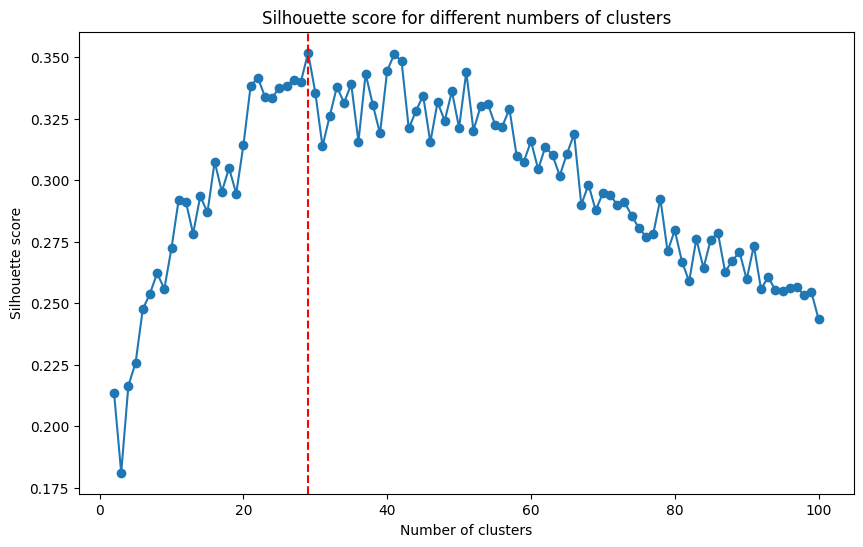

Best k number: 29


In [15]:
# Find optimal number of clusters
optimal_clusters = find_optimal_clusters(
    student_sequence_embeddings, 
    max_clusters=100, 
    random_state=36
)

print(f"Best k number: {optimal_clusters}")

In [ ]:
# k-means clustering
kmeans_model, student_clusters = perform_clustering(
    student_sequence_embeddings,
    n_clusters=optimal_clusters, 
    random_state=36
)

# Count clustering results
from collections import Counter
cluster_counts = Counter(student_clusters.values())
print("The number of students in each cluster:")
for cluster_id, count in sorted(cluster_counts.items()):
    print(f"Cluster {cluster_id}: {count} # of students")

The number of students in each cluster:
Cluster 0: 9 # of students
Cluster 1: 6 # of students
Cluster 2: 17 # of students
Cluster 3: 14 # of students
Cluster 4: 8 # of students
Cluster 5: 1 # of students
Cluster 6: 14 # of students
Cluster 7: 3 # of students
Cluster 8: 4 # of students
Cluster 9: 4 # of students
Cluster 10: 9 # of students
Cluster 11: 4 # of students
Cluster 12: 1 # of students
Cluster 13: 1 # of students
Cluster 14: 9 # of students
Cluster 15: 6 # of students
Cluster 16: 7 # of students
Cluster 17: 3 # of students
Cluster 18: 1 # of students
Cluster 19: 4 # of students
Cluster 20: 5 # of students
Cluster 21: 6 # of students
Cluster 22: 4 # of students
Cluster 23: 4 # of students
Cluster 24: 1 # of students
Cluster 25: 3 # of students
Cluster 26: 6 # of students
Cluster 27: 1 # of students
Cluster 28: 3 # of students


/Users/nickzheng/Documents/answerbook/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


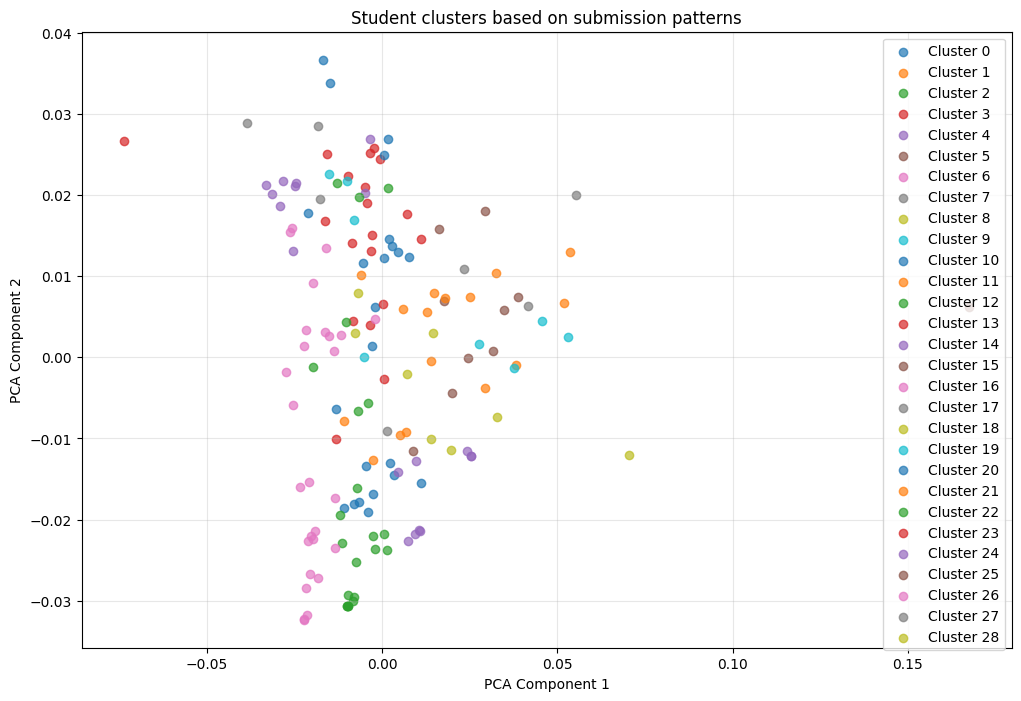

In [17]:
# Visualize clustering results
visualize_clusters(student_sequence_embeddings, student_clusters)

In [19]:
# Analyze answer sequences in clusters
import numpy as np

def analyze_clusters(student_clusters, student_paths):
    for cluster_id in set(student_clusters.values()):
        # Fetch students in the current cluster
        students_in_cluster = [s for s, c in student_clusters.items() if c == cluster_id]
        
        # Calculate average path length
        path_lengths = [len(student_paths[s]) for s in students_in_cluster if s in student_paths]
        avg_length = np.mean(path_lengths)
        
        # Find most common first and last questions
        first_questions = [student_paths[s][0] for s in students_in_cluster if s in student_paths and len(student_paths[s]) > 0]
        last_questions = [student_paths[s][-1] for s in students_in_cluster if s in student_paths and len(student_paths[s]) > 0]
        
        most_common_first = Counter(first_questions).most_common(1)[0] if first_questions else None
        most_common_last = Counter(last_questions).most_common(1)[0] if last_questions else None
        
        print(f"\nCluster {cluster_id} Analyze:")
        print(f"Number of Students: {len(students_in_cluster)}")
        print(f"Ave of path length: {avg_length:.2f}")
        print(f"Most common starter: {most_common_first}")
        print(f"Most common ender: {most_common_last}")

analyze_clusters(student_clusters, student_paths)


Cluster 0 Analyze:
Number of Students: 9
Ave of path length: 42.44
Most common starter: ('q1_p1_s1_t2', 7)
Most common ender: ('q1_p5_s1_t2', 9)

Cluster 1 Analyze:
Number of Students: 6
Ave of path length: 37.67
Most common starter: ('q1_p1_s1_t2', 6)
Most common ender: ('q2_p3_s1_t2', 6)

Cluster 2 Analyze:
Number of Students: 17
Ave of path length: 63.76
Most common starter: ('q1_p1_s1_t2', 10)
Most common ender: ('q2_p5_s1_t2', 17)

Cluster 3 Analyze:
Number of Students: 14
Ave of path length: 51.50
Most common starter: ('q1_p1_s1_t2', 11)
Most common ender: ('q2_p1_s1_t2', 14)

Cluster 4 Analyze:
Number of Students: 8
Ave of path length: 64.88
Most common starter: ('q1_p1_s1_t2', 7)
Most common ender: ('q1_p4_s1_t2', 8)

Cluster 5 Analyze:
Number of Students: 1
Ave of path length: 10.00
Most common starter: ('q1_p1_s1_t1', 1)
Most common ender: ('q2_p5_s1_t1', 1)

Cluster 6 Analyze:
Number of Students: 14
Ave of path length: 60.50
Most common starter: ('q1_p1_s1_t2', 9)
Most comm

In [20]:
# Find similar students based on sequence embeddings
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from IPython.display import HTML, display
import sys
sys.path.append('..')
from plotly_sequence_vis import plot_multiple_students_submission_sequence_plotly, filter_submissions_less_than_seconds
try:
    import answer_sequence_vis as vis_tools
    has_vis_tools = True
except ImportError:
    has_vis_tools = False

In [ ]:
def find_similar_and_dissimilar_students(student_embeddings):
    """Find the most similar and dissimilar students based on their embeddings."""
    student_ids = list(student_embeddings.keys())
    embeddings = np.array([student_embeddings[sid] for sid in student_ids])
    
    # Calculate cosine similarity matrix
    similarity_matrix = cosine_similarity(embeddings)
    mask = np.ones_like(similarity_matrix, dtype=bool)
    np.fill_diagonal(mask, False)
    
    # # Find the most similar pair
    # max_idx = np.unravel_index(np.argmax(similarity_matrix), similarity_matrix.shape)
    # most_similar = (student_ids[max_idx[0]], student_ids[max_idx[1]], similarity_matrix[max_idx])
    
    # # Find the most dissimilar pair
    # min_idx = np.unravel_index(np.argmin(similarity_matrix), similarity_matrix.shape)
    # most_dissimilar = (student_ids[min_idx[0]], student_ids[min_idx[1]], similarity_matrix[min_idx])
    
    max_idx = np.unravel_index(np.argmax(similarity_matrix * mask), similarity_matrix.shape)
    most_similar = (student_ids[max_idx[0]], student_ids[max_idx[1]], similarity_matrix[max_idx])
    
    min_idx = np.unravel_index(np.argmin(similarity_matrix * mask + (~mask)), similarity_matrix.shape)
    most_dissimilar = (student_ids[min_idx[0]], student_ids[min_idx[1]], similarity_matrix[min_idx])
    


    return most_similar, most_dissimilar

In [30]:
most_similar, most_dissimilar = find_similar_and_dissimilar_students(student_sequence_embeddings)

In [31]:
most_similar, most_dissimilar

(('44a562b488eb48ff167c7c89178f728bd88cc4c194939e851ff89af7e4c753f8',
  'e4d7981c480682d9103db680de378f3e546788625ef934f51db5662ada91336f',
  1.0),
 ('a9dca06818368b7fdc0f2308c1c6e126e83e979b3c74d2348468520414d9228e',
  'd65221d5350402e6e3a4a51f8031937310f4261953eb7cd66756b4a37a498382',
  0.66274613))

In [ ]:
def visualize_student_pairs(df, student_embeddings):
    """Create visualizations for the most similar and dissimilar students."""
    # Find similar and dissimilar student pairs
    similar_pair, dissimilar_pair = find_similar_and_dissimilar_students(student_embeddings)
    
    print(f"The most similar: {similar_pair[0][:8]}... and {similar_pair[1][:8]}... (Similarity: {similar_pair[2]:.4f})")
    print(f"The most dissimilar: {dissimilar_pair[0][:8]}... and {dissimilar_pair[1][:8]}... (Similarity: {dissimilar_pair[2]:.4f})")
    
    sorted_task_ids = vis_tools.get_sorted_task_ids(df)

    similar_students_df = df[df['student_id'].isin([similar_pair[0], similar_pair[1]])].copy()
    # similar_students_filtered = filter_submissions_less_than_seconds(similar_students_df, 15)
    
    dissimilar_students_df = df[df['student_id'].isin([dissimilar_pair[0], dissimilar_pair[1]])].copy()
    # dissimilar_students_filtered = filter_submissions_less_than_seconds(dissimilar_students_df, 15)
    
    similar_html = plot_multiple_students_submission_sequence_plotly(
        similar_students_df, 
        sorted_task_ids
    )
    dissimilar_html = plot_multiple_students_submission_sequence_plotly(
        dissimilar_students_df, 
        sorted_task_ids
    )
    
    with open("../visualization/similar/similar_students_visualization.html", "w", encoding="utf-8") as f:
        f.write(similar_html)
    
    with open("../visualization/dissimilar/dissimilar_students_visualization.html", "w", encoding="utf-8") as f:
        f.write(dissimilar_html)
    
    return similar_pair, dissimilar_pair, similar_html, dissimilar_html


In [33]:
similar_pair, dissimilar_pair, similar_html, dissimilar_html = visualize_student_pairs(df, student_sequence_embeddings)

The most similar: 44a562b4... and e4d7981c... (Similarity: 1.0000)
The most dissimilar: a9dca068... and d65221d5... (Similarity: 0.6627)
